Unsupervised Visualizations</br>
- Creates visualizations for the top Clustering models as based on R2 performance in Supervised_Unsupervised. Model clusters are visualized by color on time series of gas consumption data, either on the normalized or raw time serieses.
- Dependencies: Clusters_Norm.p, Clusters_Raw.p, Merge_Norm.csv, Merge_Raw.csv</br>
</br>



In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import pickle
import numpy as np


/var/folders/lq/0q3fzmb57s3c187k6gjyx3_00000gn/T/ipykernel_18220/1282688944.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [61]:
def data_finder (type='norm', model = 'DB', p_key = '5DB_M28eps0.000284', norm_vis = None):
    '''Input: type = Normalized or Raw model
        model = model type
        p_key = Paremeter key for model
        norm_vis = True if returning normalized time series, otherwise returns raw time series for visualization
    Output: df of the specified time series data with columns of one hot encoded cluster labels for specified model on end'''

    # Load cluster labels
    plant_dict = {}
    with open('Clusters_Norm.p', 'rb') as f:
        Norm = pickle.load(f)
    with open('Clusters_Raw.p', 'rb') as f:
        Raw = pickle.load(f)
    plant_dict['norm'] = Norm
    plant_dict['raw'] = Raw

    if norm_vis:
        data = pd.read_csv('../Merging/Merge_Norm.csv')
    else:
        data = pd.read_csv('../Merging/Merge_Raw.csv')

    plant_labels = plant_dict[type][model][p_key]
    plant_labels = plant_labels[plant_labels.sum().sort_values(ascending=False).index]
 
    data_labeled = pd.merge(left=data, right=plant_labels, how='left', left_on='plantCode', right_on='plantCode').dropna()

    return data_labeled

In [165]:
data_finder().head()

,state,plantCode,Longitude,Latitude,2019-01-01,2019-02-01,2019-03-01,2019-04-01,2019-05-01,2019-06-01,...,2022-08-01,2022-09-01,2022-10-01,2022-11-01,2022-12-01,0,1,3,2,4
0,MI,57950,-82.619167,43.266389,102105.0,88115.0,81350.0,0.0,0.0,0.0,...,0.0,86083.0,109779.0,99350.0,106351.0,1.0,0.0,0.0,0.0,0.0
1,MI,57949,-83.447222,43.741111,43145.0,37347.0,42454.0,19712.0,0.0,0.0,...,0.0,38845.0,53431.0,43853.0,46659.0,1.0,0.0,0.0,0.0,0.0
2,MI,54867,-86.644300,46.409400,11883.0,10159.0,10886.0,11237.0,10643.0,11083.0,...,18337.0,16208.0,15731.0,10704.0,14610.0,0.0,0.0,0.0,1.0,0.0
3,MI,58427,-84.551667,42.719722,595462.0,512085.0,298345.0,344856.0,463648.0,457361.0,...,466195.0,253597.0,419370.0,541031.0,597797.0,1.0,0.0,0.0,0.0,0.0
4,MI,62192,-82.479331,42.773716,0.0,0.0,0.0,0.0,0.0,0.0,...,4279821.0,4144307.0,4071685.0,3513872.0,2357711.0,1.0,0.0,0.0,0.0,0.0


In [162]:
def plot_res (norm_vis=False):
    '''Input: norm_vis = if True will return visualization on normalized time series data, otherwise will be on raw time series data
    Output: plots the top models trained on normalized and raw data on specified time series representation'''

    if norm_vis == True:
        title = 'Normalized'
    else:
        title = 'Raw'

    with open('Cluster_Results.p', 'rb') as f:
        results = pickle.load(f)

    fig, axs = plt.subplots(4,2,figsize=(14, 20))
    colors = ['r','g','b','y','m','c','k', 'orange', 'teal', 'darkorchid','r','g','b','y','m','c','k', 'orange', 'teal', 'darkorchid']

    fig.tight_layout(pad=5.0)
    
    for idx, type in enumerate(['norm', 'raw']):
        if type == 'norm':
            label = 'Normalized'
        else:
            label = 'Raw'
        for row in range(len(results[type]['Best'])):
            model = results[type]['Best'].iloc[row]
            data = data_finder(type=type, model = model['Model'], p_key = model['Parameter Key'], norm_vis=norm_vis)
            k = len(data.columns)-(len(pd.read_csv('../Merging/Merge_Raw.csv').columns))
            for i in range(0,k):
                k_col = data.columns[-(k-i)]
                axs[row][idx].plot(data[data[k_col] == 1].iloc[:,4:-k].T, alpha=.25, color=colors[i])
                axs[row][idx].title.set_text(f"\n {label} Data, {model['Model']} Model, k={k}, R2 = {round(model['R-squared'], 4)}, \n Parameters:{model['params']}")
                ymin, ymax = axs[row][idx].get_xlim()
                axs[row][idx].set_xticks(np.round(np.linspace(ymin, ymax, 6), 2))
                axs[row][idx].set_xticklabels(['', '2019', '2020', '2021', '2022', ''])
                axs[row][idx].set_ylabel('Gas Consumption in btu', fontsize=11)
                axs[row][idx].set_xlabel('Year', fontsize=11)
    #plt.suptitle(f'Clusters Visualized on {title} Data')
    

    return plt.show()
    

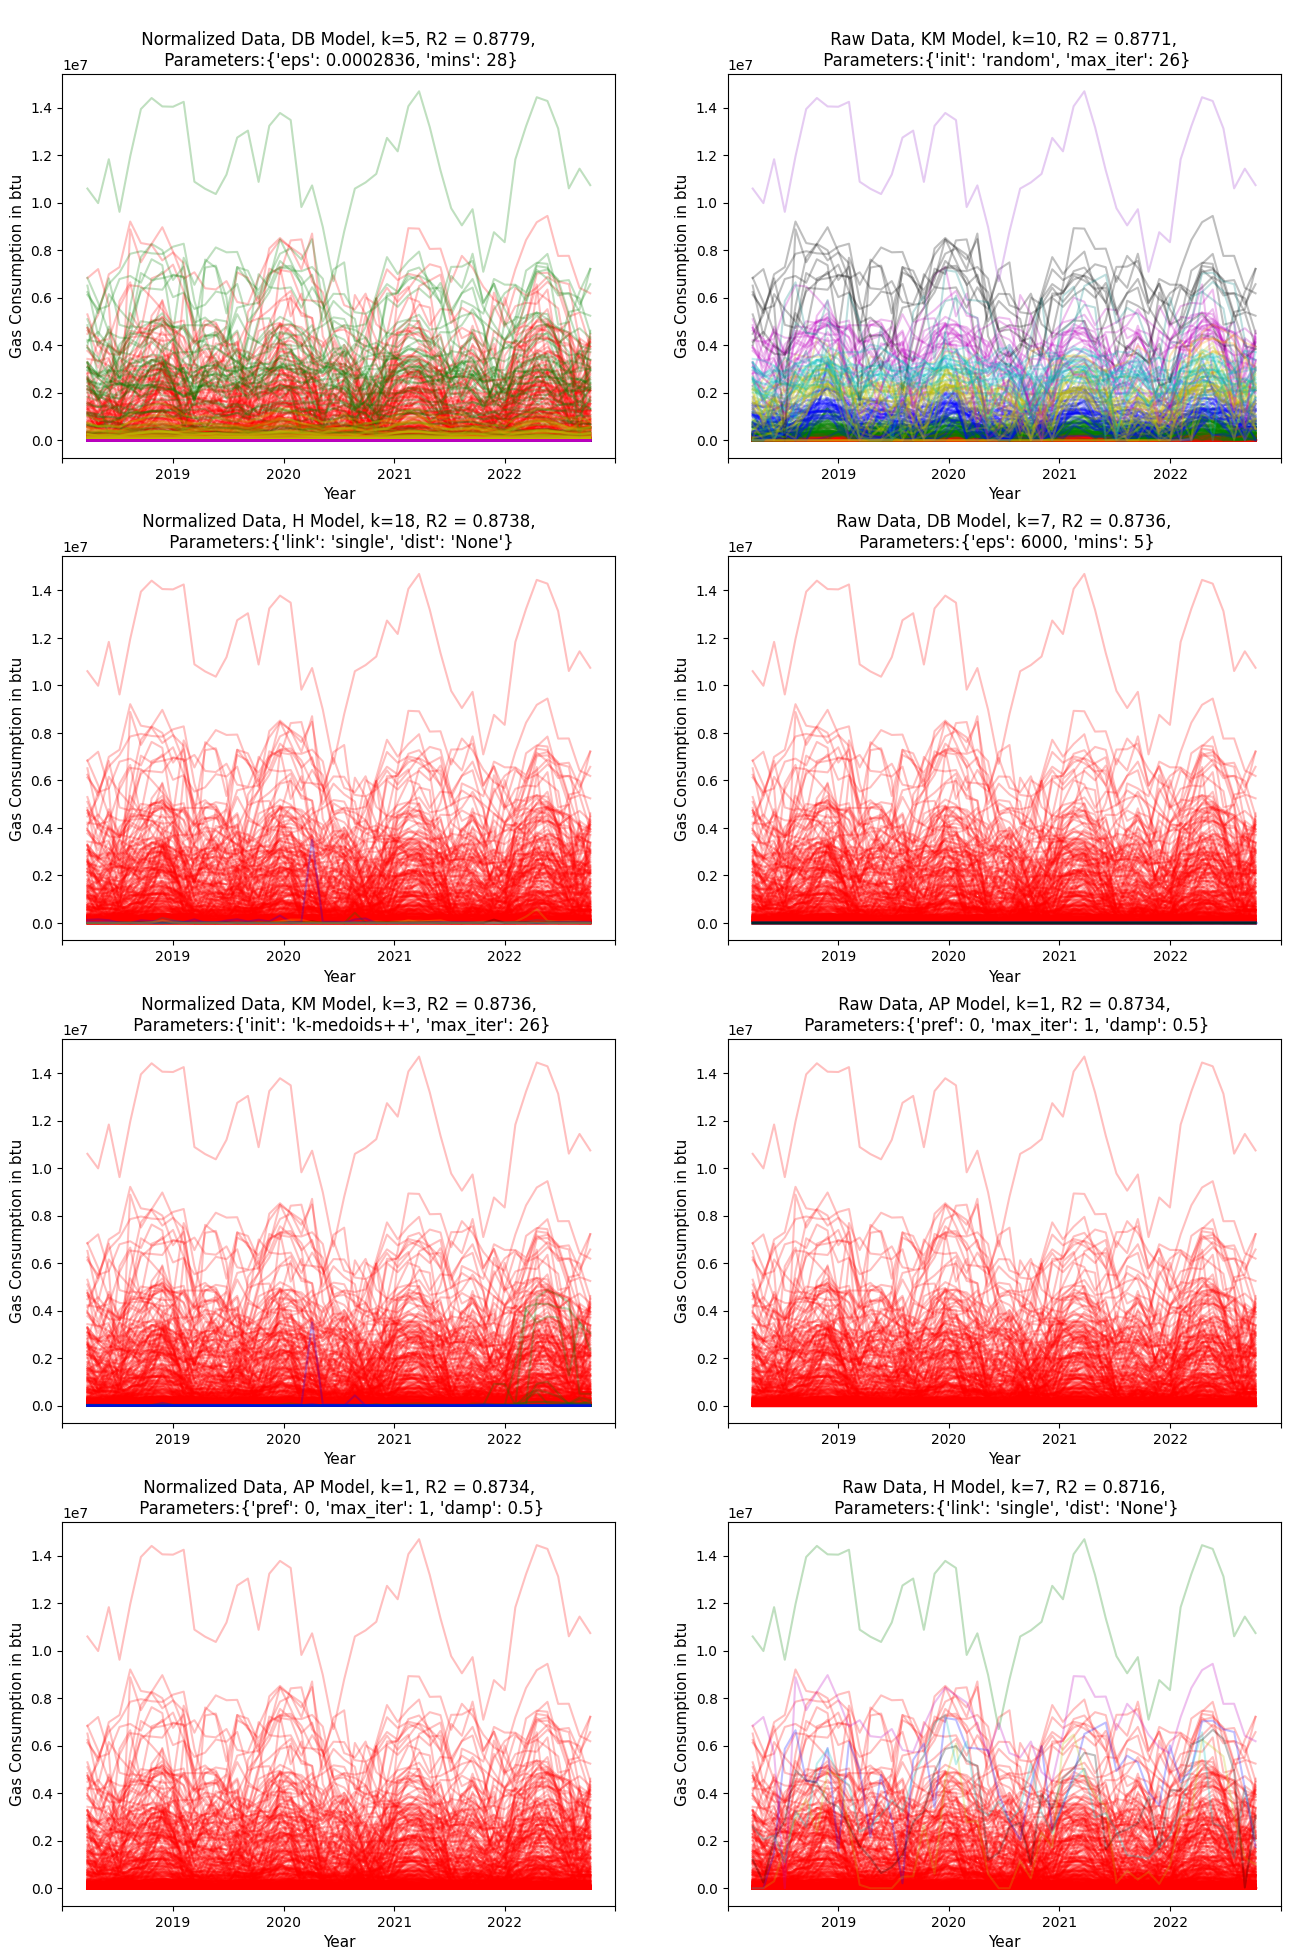

In [163]:
#Top Models Clusters visualized on Raw Data
plot_res ()

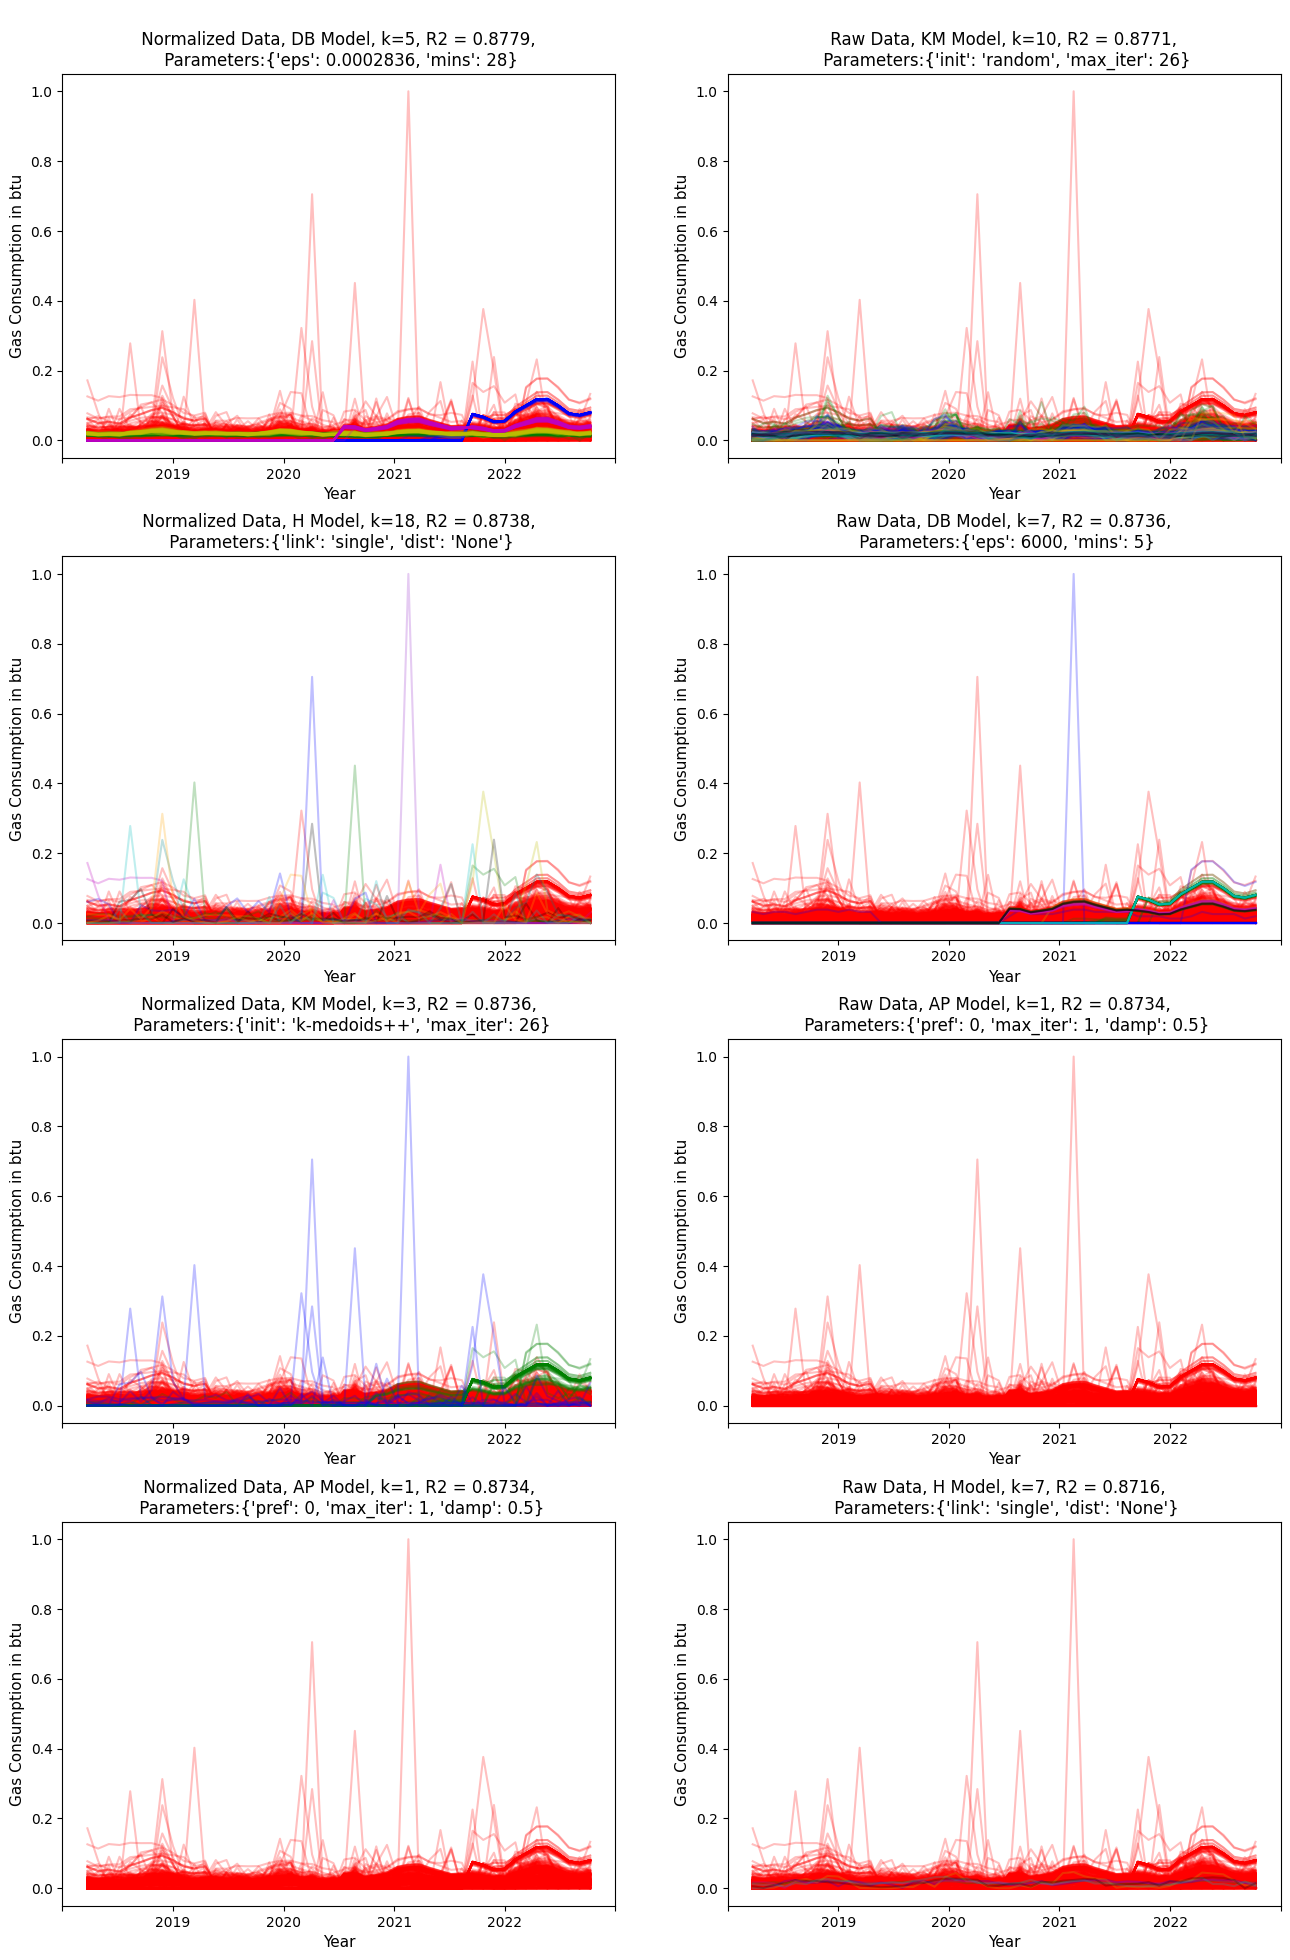

In [164]:
#Top Models Clusters visualized on Normalized Data
plot_res (norm_vis=True)